In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


In [57]:
# import data
data = pd.read_csv('Données_marché_Lait.csv')
print('Dataset length:', len(data))
data.head()

Dataset length: 10898


,Date,Composants de coûts,Devise,Type de données,Source de données,Commerce extérieur,Indicateur,Marché,Produit,Groupe de produits,Système de production,Provenance du produit,Propriétés du produit,Sous-groupe de produits,Région de vente,Unité,Mode d’utilisation,Echelon de création de valeur_Détail,Echelon de création de valeur,Prix
0,01-2024,TVA incluse,Centimes,Valeur réalisée,"OFAG, secteur Analyses du marché",NaN,Prix,Lait et produits laitiers,Lait de centrale (conventionnel),Lait cru,Conventionnel,Région 2,NaN,Lait cru CH,Suisse,kg,NaN,Au départ de la ferme (échelon de la production),Production,70.590753
1,01-2024,TVA incluse,Centimes,Valeur réalisée,"OFAG, secteur Analyses du marché",NaN,Prix,Lait et produits laitiers,Lait de prairie IP Suisse,Lait cru,IP Suisse,Suisse,NaN,Lait cru CH,Suisse,kg,Lait cru sans définition supplémentaire,Au départ de la ferme (échelon de la production),Production,76.338026
2,01-2024,TVA incluse,Centimes,Valeur réalisée,"OFAG, secteur Analyses du marché",NaN,Prix,Lait et produits laitiers,Lait transformé en fromage (conventionnel),Lait cru,Conventionnel,Suisse,NaN,Lait cru CH,Suisse,kg,NaN,Au départ de la ferme (échelon de la production),Production,77.631932
3,01-2024,TVA incluse,Centimes,Valeur réalisée,"OFAG, secteur Analyses du marché",NaN,Prix,Lait et produits laitiers,"Lait CH, total",Lait cru,NaN,Région 5,NaN,Lait cru CH,Suisse,kg,NaN,Au départ de la ferme (échelon de la production),Production,77.900726
4,01-2024,NaN,Centimes,Prix indicatif,IPL,NaN,Prix,Lait et produits laitiers,"Lait conventionnel, total",Lait cru,Conventionnel,Suisse,NaN,Lait cru CH,Suisse,kg,segment A,Production non définie,Production,79.000000


In [58]:
# Check number of unique values in each column
data.nunique()

Date                                      277
Composants de coûts                         2
Devise                                      1
Type de données                             2
Source de données                           8
Commerce extérieur                          0
Indicateur                                  1
Marché                                      1
Produit                                    20
Groupe de produits                          1
Système de production                       3
Provenance du produit                      14
Propriétés du produit                       0
Sous-groupe de produits                     2
Région de vente                             8
Unité                                       1
Mode d’utilisation                          3
Echelon de création de valeur_Détail        2
Echelon de création de valeur               1
Prix                                    10334
dtype: int64

In [59]:
# At this point you can remove column with unique values which are not useful and does not 
# provide information for the analysis for example Devise and Groupe de produit
# ATENTION il faut bien retenir que la devise est en centimes pour l'analyse
clean_data = data.copy()
# drop columns
clean_data = clean_data.drop(['Devise', 'Groupe de produits', 'Commerce extérieur', 'Indicateur',\
                   'Marché', 'Propriétés du produit', 'Unité', 'Echelon de création de valeur '], axis=1)

clean_data.head()

,Date,Composants de coûts,Type de données,Source de données,Produit,Système de production,Provenance du produit,Sous-groupe de produits,Région de vente,Mode d’utilisation,Echelon de création de valeur_Détail,Prix
0,01-2024,TVA incluse,Valeur réalisée,"OFAG, secteur Analyses du marché",Lait de centrale (conventionnel),Conventionnel,Région 2,Lait cru CH,Suisse,NaN,Au départ de la ferme (échelon de la production),70.590753
1,01-2024,TVA incluse,Valeur réalisée,"OFAG, secteur Analyses du marché",Lait de prairie IP Suisse,IP Suisse,Suisse,Lait cru CH,Suisse,Lait cru sans définition supplémentaire,Au départ de la ferme (échelon de la production),76.338026
2,01-2024,TVA incluse,Valeur réalisée,"OFAG, secteur Analyses du marché",Lait transformé en fromage (conventionnel),Conventionnel,Suisse,Lait cru CH,Suisse,NaN,Au départ de la ferme (échelon de la production),77.631932
3,01-2024,TVA incluse,Valeur réalisée,"OFAG, secteur Analyses du marché","Lait CH, total",NaN,Région 5,Lait cru CH,Suisse,NaN,Au départ de la ferme (échelon de la production),77.900726
4,01-2024,NaN,Prix indicatif,IPL,"Lait conventionnel, total",Conventionnel,Suisse,Lait cru CH,Suisse,segment A,Production non définie,79.000000


On va mtn regarder les Nan, on va les remplacer ou juste les drop selon l'info qu'on tire :

In [60]:
# show unique values in each column
columns = ['Composants de coûts', 'Type de données', 'Source de données', 'Système de production',\
            'Provenance du produit', 'Sous-groupe de produits', 'Région de vente', 'Mode d’utilisation', 'Echelon de création de valeur_Détail']
for col in columns:
    print(col, clean_data[col].unique(), '\n')


Composants de coûts ['TVA incluse' nan 'Hors TVA'] 

Type de données ['Valeur réalisée' 'Prix indicatif'] 

Source de données ['OFAG, secteur Analyses du marché' 'IPL' 'CLAL Italien' 'IFE'
 'France Agrimer' 'AMA Österreich' 'BLE Deutschland'
 'Commission européenne'] 

Système de production ['Conventionnel' 'IP Suisse' nan 'Bio'] 

Provenance du produit ['Région 2' 'Suisse' 'Région 5' 'Région 1' 'Italie'
 'Reste du monde, non suisse' 'Région 4' 'Région 3' 'France'
 'Nouvelle-Zélande' 'USA / Canada' 'Autriche' 'Allemagne' 'UE'] 

Sous-groupe de produits ['Lait cru CH' 'Lait cru, International'] 

Région de vente ['Suisse' 'Italie' nan 'France' 'Nouvelle-Zélande' 'USA' 'Autriche'
 'Allemagne' 'UE-28'] 

Mode d’utilisation [nan 'Lait cru sans définition supplémentaire' 'segment A' 'segment B'] 

Echelon de création de valeur_Détail ['Au départ de la ferme (échelon de la production)'
 'Production non définie'] 



On drop toutes les régions non suisses de la colonne "provenance du produit".

In [61]:
# créer une nouvelle variable incluant toutes les régions suisses
suisse_region = ['Région 1', 'Région 2', 'Région 3', 'Région 4', 'Région 5'] 
# Après c'est bien de revenir la dessus et de faire une analyse après avec le reste des pays pour comparer la suisse avec les autres pays

# filter data to keep only switzerland production
swiss_production_data = clean_data[clean_data['Provenance du produit'].isin(suisse_region)]

In [62]:
# is there any nan in prix column
swiss_production_data['Prix'].isna().sum()
# Replace nan in the whole dataset with 'unknown'
swiss_production_data = swiss_production_data.fillna('unknown')

# Convert date from string to datetime
swiss_production_data['Date'] = pd.to_datetime(swiss_production_data['Date'])

print(swiss_production_data['Région de vente'].unique())
# Le fait que Region de vente n'ait plus qu'une valeur unique signifie que tout le lait produit en suisse est vendu en suisse
# C'est une colonne avec plus qu'une seule info donc on peut potentiellement la supprimer, c'est pour ca que c'est en blanc dans le correlation plot
# IDEM pour sous groupe de produits
len(swiss_production_data)


['Suisse']


/var/folders/f4/kx7jr27n4zn4nl2q5701x0g40000gn/T/ipykernel_1428/3713976618.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



5817

In [63]:
# Can't deal with string for statistical analysis, so we need to convert them to numerical values
# Label encoding

# # Initialize a label encoder for each string column
# label_encoders = {}

# for column in swiss_production_data.columns:
#     if swiss_production_data[column].dtype == 'object':  # if the column has string values
#         le = LabelEncoder()
#         swiss_production_data[column] = le.fit_transform(swiss_production_data[column])
#         label_encoders[column] = le  # store the label encoder for future reference

# # Now df is encoded and you have a dictionary of label encoders for each string column
# print(swiss_production_data.head())

UNIVARIATE ANALYSIS 

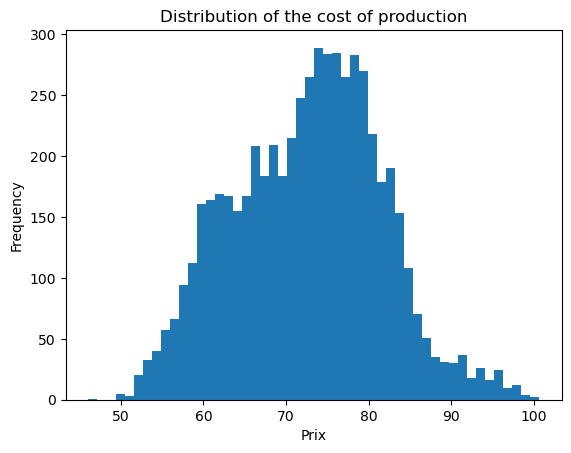

In [64]:
# plot distribution of the cost of production
plt.hist(swiss_production_data['Prix'], bins=50)
plt.xlabel('Prix')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of production')
plt.show()

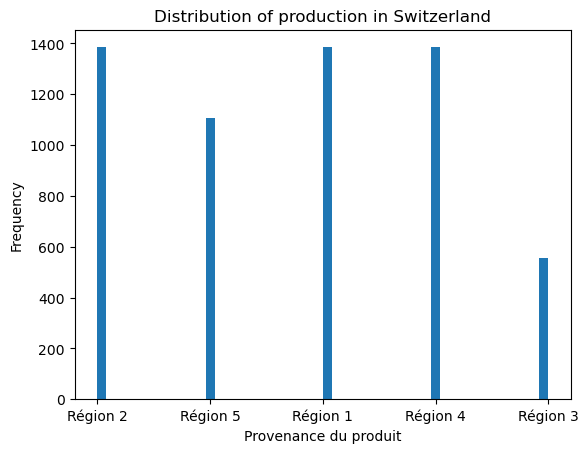

In [65]:
# plot distribution of the repartition of production in Switzerland
plt.hist(swiss_production_data['Provenance du produit'], bins=50)
plt.xlabel('Provenance du produit')
plt.ylabel('Frequency')
plt.title('Distribution of production in Switzerland')
plt.show()

In [66]:
# Vérifiez et triez les données par année si nécessaire.
swiss_production_data['Date'] = pd.to_datetime(swiss_production_data['Date']).dt.year
swiss_production_data = swiss_production_data[swiss_production_data['Date'].between(2001, 2024)]
swiss_production_data.sort_values('Date', inplace=True)

# Créez le graphique avec Plotly Express.
fig = px.bar(
    swiss_production_data, 
    x='Provenance du produit', 
    y='Prix', 
    color='Système de production', 
    barmode='group',
    animation_frame='Date'  
)

# Mise à jour des titres.
fig.update_layout(
    title_text='Prix moyen de la production de lait, en fonction de la région et du système de production',
    xaxis_title='Provenance du Lait',
    yaxis_title='Prix moyen',
)

# Ajouter des détails de hover.
fig.update_traces(
    hovertemplate='Provenance du produit: %{x}<br>Système de production: %{marker.color}<br>Date: %{animation_frame}<br>Prix: %{y}'
)

# Créez des étapes pour le slider.
years = swiss_production_data['Date'].unique()
steps = []
for year in years:
    step = dict(
        method='animate',
        label=str(year),
        args=[[str(year)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate'}]
    )
    steps.append(step)

# Ajoutez le slider à la figure.
fig.update_layout(
    sliders=[{'steps': steps}]
)

# Supprimez le bouton de lecture automatique.
fig.layout.updatemenus[0].buttons = []

# Affichez le graphique.
fig.show()



MULTIVARIATE ANALYSIS 

Evolution du prix moyen du lait à l'échelle nationale suisse

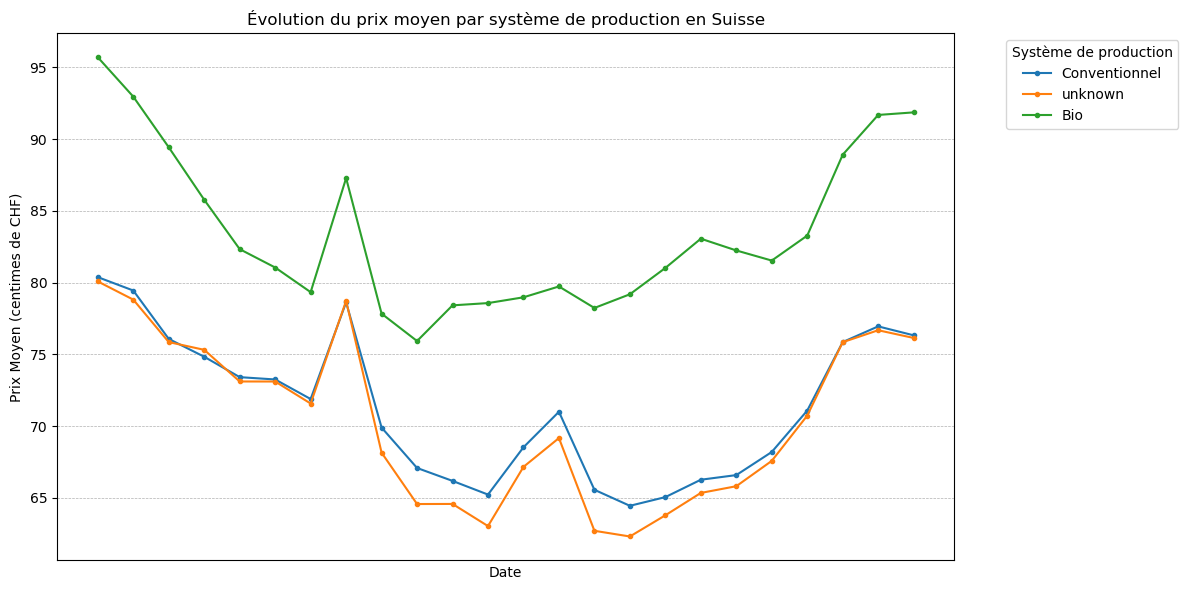

In [70]:
# plot "l'évolution du prix moyen de production en fonction du système de production"
# Calculer la moyenne des prix pour chaque date et chaque système de production
swiss_production_data_moyenne = swiss_production_data.groupby(['Date', 'Système de production'])['Prix'].mean().reset_index()

# Sélectionner les systèmes de production uniques
systemes_production = swiss_production_data['Système de production'].unique()

# Créer un graphique pour chaque système de production
plt.figure(figsize=(12, 6))  # Ajuste la taille du graphique selon tes besoins

for systeme in systemes_production:

    # Filtrer le DataFrame pour chaque système de production
    swiss_production_data_filtre = swiss_production_data_moyenne[swiss_production_data_moyenne['Système de production'] == systeme]
 
    # Tracer la courbe pour le système de production filtré
    plt.plot(swiss_production_data_filtre['Date'], swiss_production_data_filtre['Prix'],marker='.', linestyle='-', label=systeme)

# Ajout des légendes, titres et étiquettes
plt.title('Évolution du prix moyen par système de production en Suisse')
plt.xlabel('Date')
plt.ylabel('Prix Moyen (centimes de CHF)')
plt.legend(title='Système de production', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajoute une légende pour distinguer les systèmes et déplace la à l'extérieur
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Utilisation des locators et formatters pour l'axe des x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Un tick par année
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Afficher seulement l'année

plt.xticks(rotation=45)  # Rotation des étiquettes pour les rendre lisibles

plt.tight_layout()  # Ajuste la disposition
plt.show()  # Affiche le graphique




Evolution du prix moyen du lait à l'échelle internationale 

/var/folders/f4/kx7jr27n4zn4nl2q5701x0g40000gn/T/ipykernel_1428/516812024.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



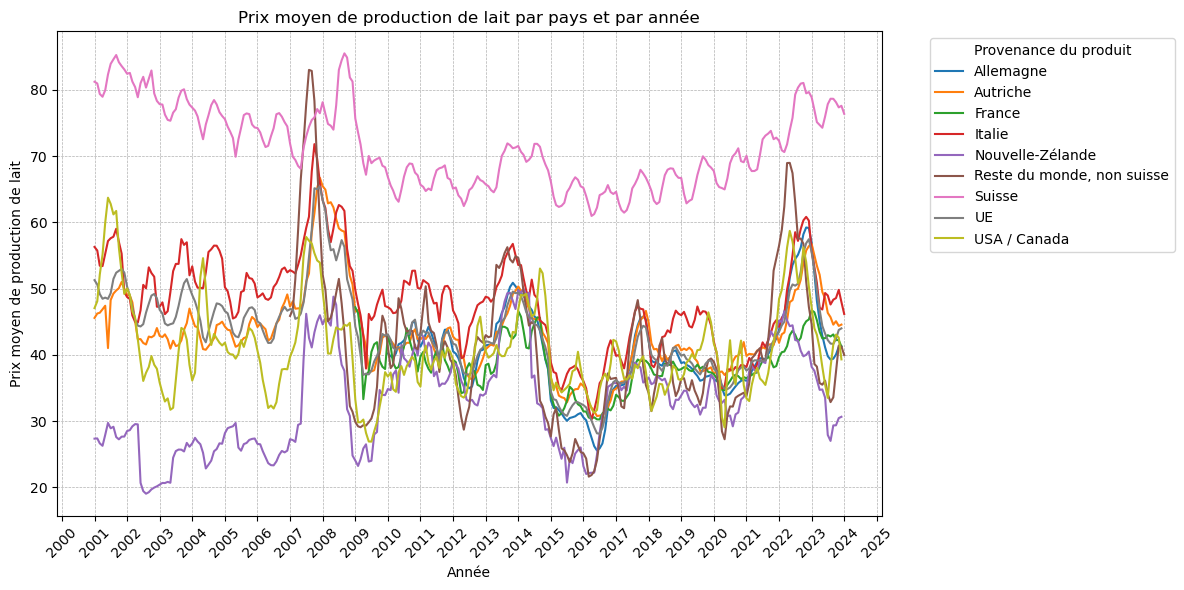

In [69]:
# Convert date from string to datetime
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

# Grouper les régions suisses ensemble 
suisse_region = ['Région 1', 'Région 2', 'Région 3', 'Région 4', 'Région 5', 'Other'] 

# Remplacer les noms des pays par 'Groupe'
clean_data['Provenance du produit'] = clean_data['Provenance du produit'].replace(suisse_region, 'Suisse')


# Grouper les données par 'Provenance du produit' et 'Date', puis calculer la moyenne des prix 
prix_moyen_par_pays_et_annee = clean_data.groupby(['Provenance du produit', 'Date'])['Prix'].mean().reset_index()

# Préparer la figure
plt.figure(figsize=(12, 6))

# Boucler sur chaque pays pour le tracer
for pays in prix_moyen_par_pays_et_annee['Provenance du produit'].unique():
    subset = prix_moyen_par_pays_et_annee[prix_moyen_par_pays_et_annee['Provenance du produit'] == pays]
    plt.plot(subset['Date'], subset['Prix'], label=pays)

# Ajouter des légendes et titres
plt.legend()
plt.title('Prix moyen de production de lait par pays et par année')
plt.xlabel('Année')
plt.ylabel('Prix moyen de production de lait')
plt.legend(title='Provenance du produit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45) # Pour une meilleure lisibilité des dates
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Utilisation des locators et formatters pour l'axe des x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Un tick par année
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Afficher seulement l'année

plt.tight_layout()  # Ajuste la disposition
plt.show()

